In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../jupyter/environment/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df=df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
X=pd.get_dummies(df.drop('species',axis=1), drop_first=True)

In [5]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,True,False,True
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,False


In [6]:
X=pd.get_dummies(X,drop_first=True)

In [8]:
X=X.drop('sex_MALE',axis=1)
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE
0,39.1,18.7,181.0,3750.0,False,True,False
1,39.5,17.4,186.0,3800.0,False,True,True
2,40.3,18.0,195.0,3250.0,False,True,True
4,36.7,19.3,193.0,3450.0,False,True,True
5,39.3,20.6,190.0,3650.0,False,True,False
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True
340,46.8,14.3,215.0,4850.0,False,False,True
341,50.4,15.7,222.0,5750.0,False,False,False
342,45.2,14.8,212.0,5200.0,False,False,True


In [9]:
y=df.species
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: object

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc=RandomForestClassifier(n_estimators=10,
                           max_features='sqrt',random_state=101)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [22]:
preds=rfc.predict(X_test)

In [23]:
preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adel

In [26]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [28]:
cm=confusion_matrix(y_test,preds)

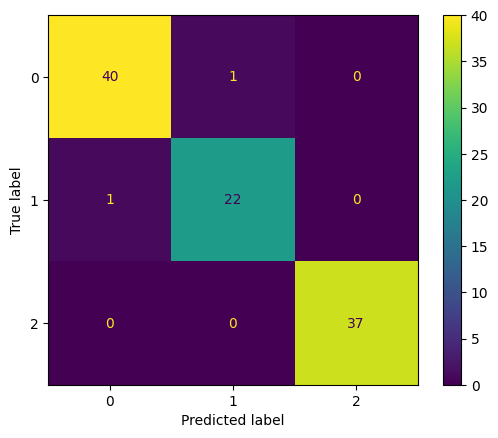

In [30]:
ConfusionMatrixDisplay(cm).plot()

In [31]:
rfc.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

In [32]:
df=pd.read_csv('../jupyter/environment/data_banknote_authentication.csv')
df

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<Figure size 1600x1600 with 0 Axes>

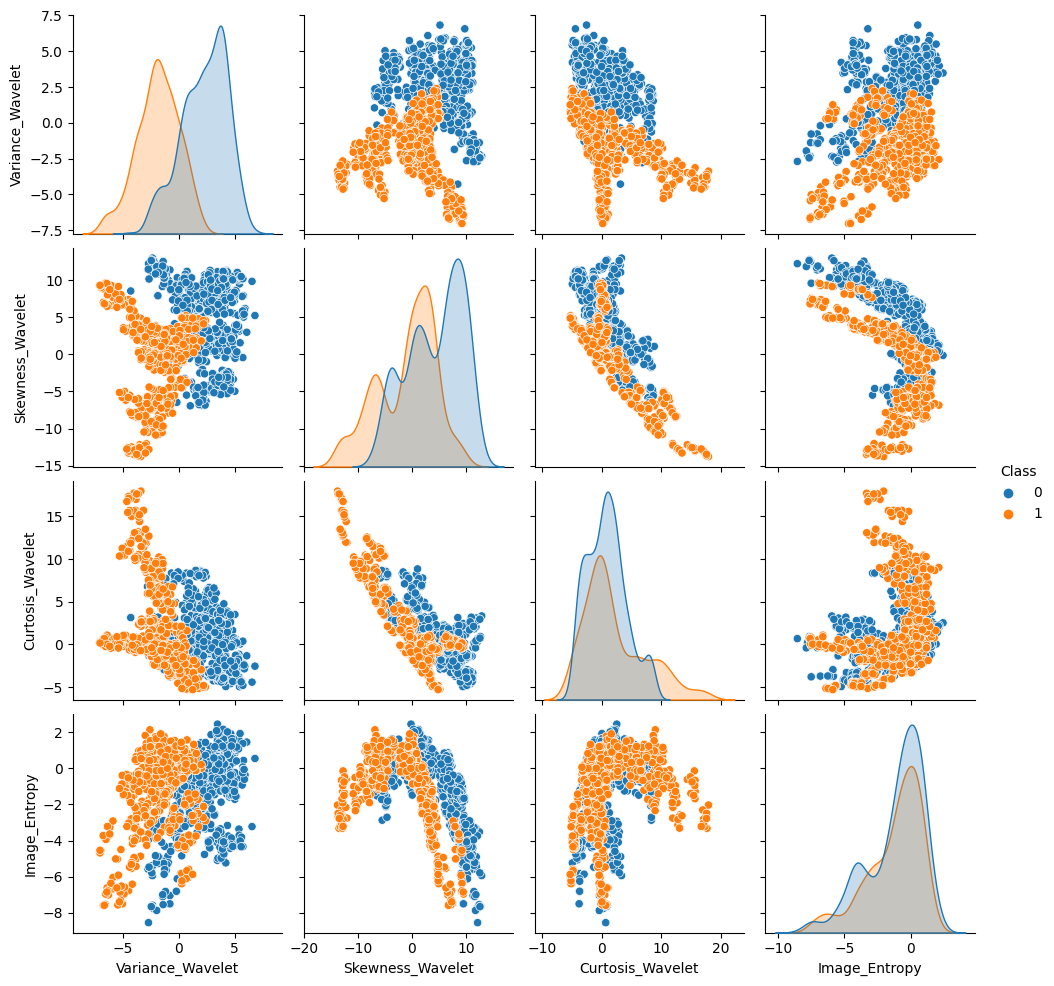

In [35]:
plt.figure(figsize=(16,16))
sns.pairplot(df,hue='Class')

In [36]:
X=df.drop('Class',axis=1)
X

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [37]:
y=df.Class
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [40]:
from sklearn.model_selection import GridSearchCV

In [43]:
rfc=RandomForestClassifier()
n_estimators=[64,100,128,200]
max_features=[2,3,4]
bootstrap=[True,False]
oob_score=[True,False]
param_grid={'n_estimators':n_estimators,'max_features':max_features,
            'bootstrap':bootstrap,'oob_score':oob_score}
grid=GridSearchCV(rfc,param_grid)

In [44]:
grid.fit(X_train,y_train)

/home/arwin/jupyter/environment/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/arwin/jupyter/environment/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/arwin/jupyter/environment/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [45]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [46]:
rfc=RandomForestClassifier(max_features=2,n_estimators=100,oob_score=True)


In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [49]:
yHat=rfc.predict(X_test)

In [50]:
print(classification_report(y_test,yHat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



In [60]:
cm=confusion_matrix(y_test,yHat)
cm[0,1]

1

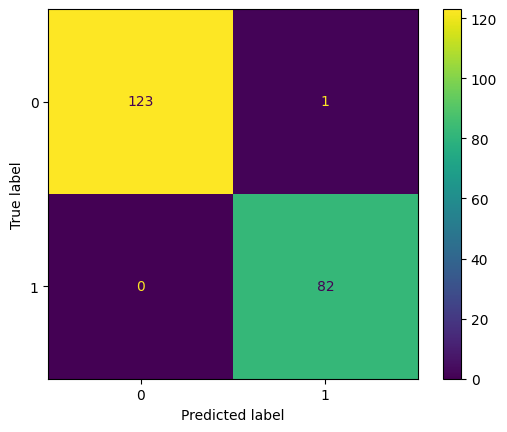

In [54]:
ConfusionMatrixDisplay(cm).plot()

In [57]:
rfc.oob_decision_function_
from sklearn.metrics import accuracy_score

<Axes: xlabel='Class', ylabel='count'>

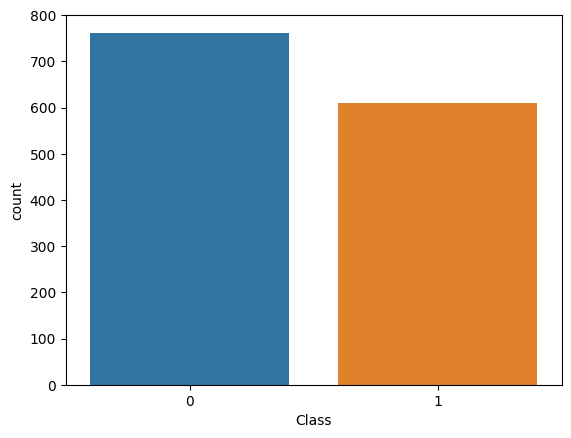

In [62]:
rfc.oob_score_
accuracy_score(y_test,yHat)
sns.countplot(df,x='Class')

In [63]:
errors=[]
misclass=[]
for n in range(1,200):
    rfc=RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds=rfc.predict(X_test)
    errors.append(1-accuracy_score(y_test,preds))
    misclass.append(sum(y_test!=preds))

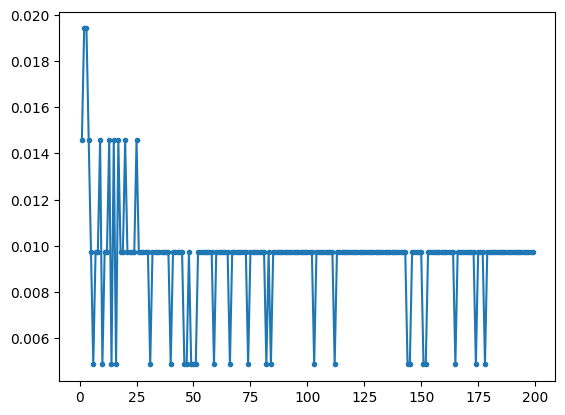

In [70]:
plt.plot(range(1,200),errors,'.-')

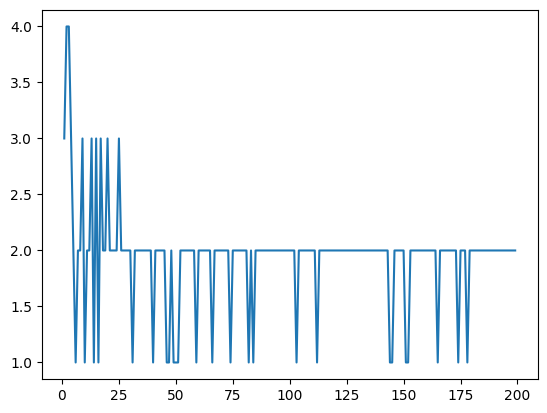

In [71]:
plt.plot(range(1,200),misclass)

In [72]:
from sklearn.ensemble import RandomForestRegressor